In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

# Table of Contents
>## 1. Introduction
* 1.1. Pros & Cons
* 1.2. Categorization

>## 2. Majority Voting
* 2.1. Majority Voting - `Scikit-Learn`
* 2.2. Performance Improvement through Ensemble

>## 3. Bagging
* 3.1. Bagging - `Scikit-Learn`

>## 4. Random Forest
* 4.1. Random Forest - `Scikit-Learn`
* 4.2. Feature Importance

>## 5. Adaboost
* 5.1. Adaboost - `Scikit-Learn`

>## 6. Gradient Boost
* 6.1. Gradient Boost - `Scikit-Learn`
* 6.2. `XGBoost`

# 1. Introduction
* **Ensemble Methods**: **merge multiple models** $\rightarrow$ **improve performance**

## 1.1. Pros & Cons
* **Advantage**: Performance $\uparrow$, Performance variance $\downarrow$, Prevents overfitting 
* **Disadvantage**: Calculation complexity $\uparrow$

## 1.2. Categorization
### Aggregation
* Set of models are pre-decided
>* **Majority Voting**
>* **Bagging**
>* **Random Forest** (Bagging + Decision Trees)

### Boosting
* Models are added on-demand
>* **AdaBoost**
>* **Gradient Boost**

# 2. Majority Voting
* **Hard Voting** - simple voting / based on classfication result
* **Soft Voting** - weighted voting / based on conditional probability

## 2.1. Majority Voting - `Scikit-Learn`
* **`VotingClassifier` class**
>```python
sklearn.ensemble.VotingClassifier(estimators, voting='hard', weights=None)
```
* **Parameters**:
  * `estimators`: list of models
  * `voting`: `'hard'` or `'soft'` / default = `'hard'`
  * `weights`: weights

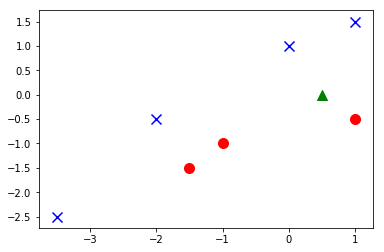

In [3]:
X = np.array([[-1, -1], [-1.5, -1.5], [1, -0.5], 
              [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])

plt.scatter(X[y==1,0], X[y==1,1], s=100, marker='o', c='r')
plt.scatter(X[y==2,0], X[y==2,1], s=100, marker='x', c='b')

x_new = [0.5, 0]

plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g')
plt.show()

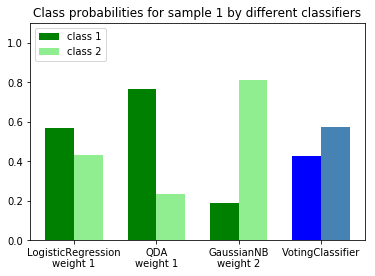

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
                            voting='soft', weights=[1, 1, 2])

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

ind = np.arange(4)
width = 0.35  # bar width
p1 = plt.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color='green')
p2 = plt.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width, color='lightgreen')
p3 = plt.bar(ind, [0, 0, 0, class1_1[-1]], width, color='blue')
p4 = plt.bar(ind + width, [0, 0, 0, class2_1[-1]], width, color='steelblue')

plt.xticks(ind + 0.5 * width, ['LogisticRegression\nweight 1',
                               'QDA\nweight 1',
                               'GaussianNB\nweight 2',
                               'VotingClassifier'])
plt.ylim([0, 1.1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


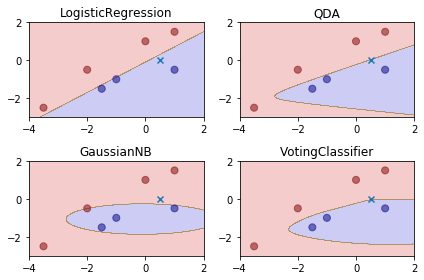

In [6]:
from itertools import product

x_min, x_max = -4, 2
y_min, y_max = -3, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005), np.arange(y_min, y_max, 0.005))
f, axarr = plt.subplots(2, 2)
for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [model1, model2, model3, ensemble],
                        ['LogisticRegression', 'QDA', 'GaussianNB', 'VotingClassifier']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s=50, cmap=mpl.cm.jet)
    axarr[idx[0], idx[1]].scatter(x_new[0], x_new[1], marker='x')
    axarr[idx[0], idx[1]].set_title(tt)
plt.tight_layout()    
plt.show()

## 2.2. Performance Improvement through Ensemble
* Single Model: $p$ chance of being correct
* Ensemble of $N$ Models:

>$$ \sum_{k>\frac{N}{2}}^N \binom N k p^k (1-p)^{N-k} $$ 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  after removing the cwd from sys.path.


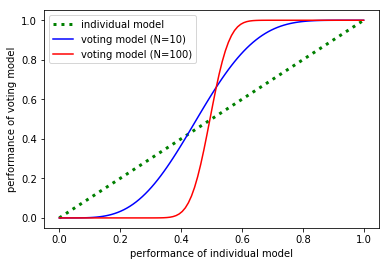

In [7]:
def total_error(p, N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N + 1):
        te += sp.misc.comb(N, k) * p**k * (1-p)**(N-k)
    return te

x = np.linspace(0, 1, 100)
plt.plot(x, x, 'g:', lw=3, label="individual model")
plt.plot(x, total_error(x, 10), 'b-', label="voting model (N=10)")
plt.plot(x, total_error(x, 100), 'r-', label="voting model (N=100)")
plt.xlabel("performance of individual model")
plt.ylabel("performance of voting model")
plt.legend(loc=0)
plt.show()

# 3. Bagging
* Single Model $\rightarrow$ Choose training data differently $\rightarrow$ Multiple Models $\rightarrow$ Majority Voting
* **Categorization**:
  * **Pasting**: randomly select data / replacement O
  * **Bagging**: randomly select data / replacement X
  * **Random Subspaces**: randomly select some variables
  * **Random Patches**: randomly select data & variables
* **Performance Test**
  * Use un-used data - **OOB(Out Of Bag) data**

## 3.1. Bagging - `Scikit-Learn`
* `BaggingClassifier` class

>```python
sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
```

* **Parameters**:
 * `base_estimator`: default model
 * `n_estimators`: no. of models / integer / default=10
 * `max_samples`: no. OR proportion of samples to select / integer or float / default=1.0
 * `max_features`: no. OR proportion of dimensions to select / integer or float / default=1.0
 * `bootstrap`: sample replacement - yes or no / boolean / default=`'True'`
 * `bootstrap_features`: dimension replacement - yes or no / boolean / default=`'False'`
 * `oob_score`: use OOB sample for test / boolean / default=`'False'`

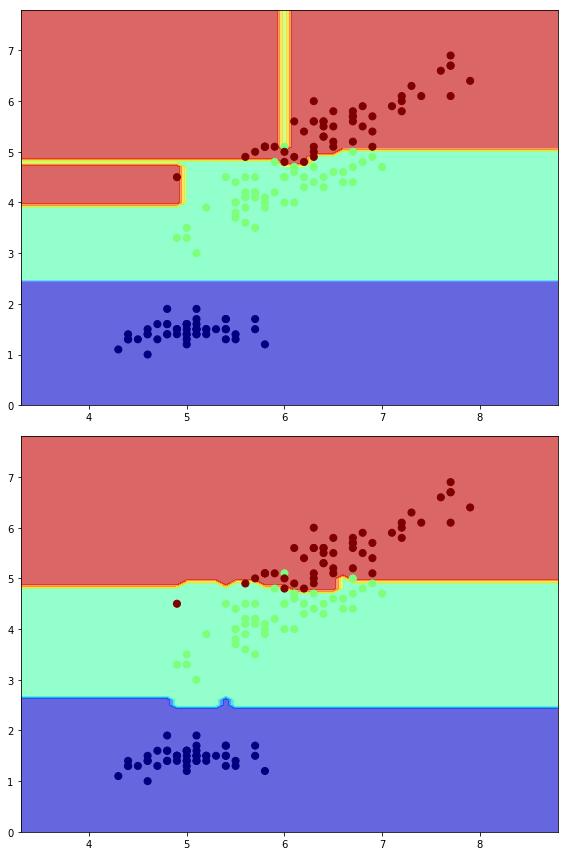

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier().fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features=True, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.figure(figsize=(8,12))

plt.subplot(211)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)

plt.subplot(212)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet)

plt.tight_layout()
plt.show()

# 4. Random Forest
* Used random decision trees
* For each node, **randomly disregard some dimensions**
  * Such process decreases the correlation between models
* **Extremely Randomized Trees**:
  * For each node, randomly select one dimension
  

## 4.1. Random Forest - `Scikit-Learn`
* `RandomForestClassifier` class - Random Forest
* `ExtraTreesClassifier` class - Extremely Randomized Trees

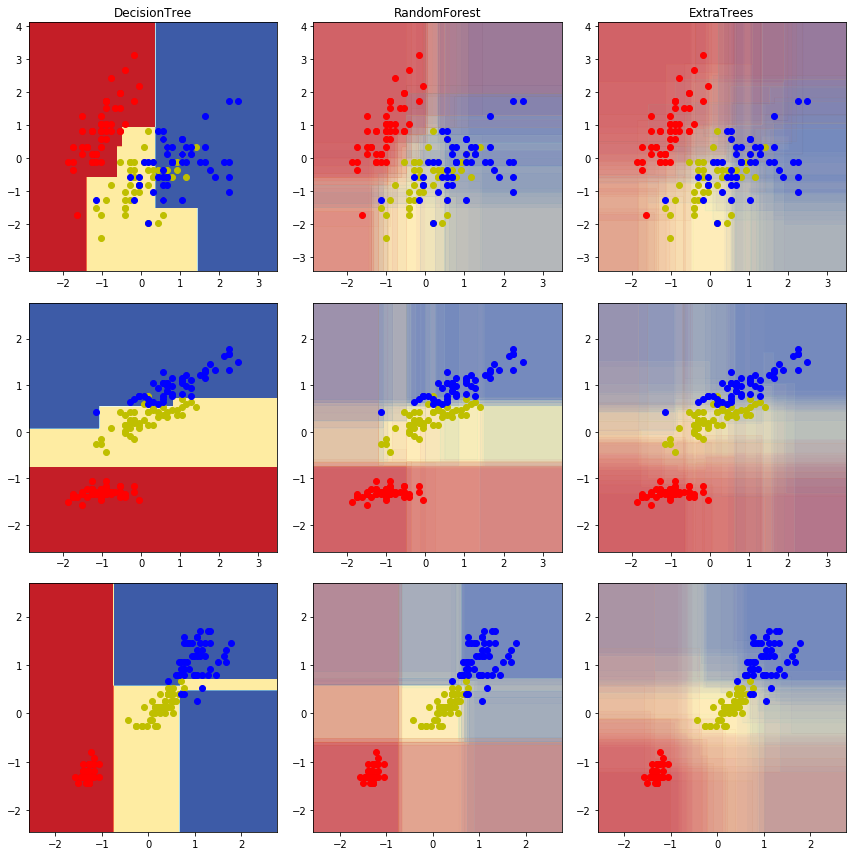

In [9]:
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

n_classes = 3
n_estimators = 30
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02
seed = 13

models = [DecisionTreeClassifier(max_depth=4),
          RandomForestClassifier(max_depth=4, n_estimators=n_estimators),
          ExtraTreesClassifier(max_depth=4, n_estimators=n_estimators)]

plot_idx = 1
plt.figure(figsize=(12, 12))
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X = iris.data[:, pair]
        y = iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(seed)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        clf = clone(model)
        clf = model.fit(X, y)

        plt.subplot(3, 3, plot_idx)
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        if plot_idx <= len(models):
            plt.title(model_title)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        for i, c in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=c,
                        label=iris.target_names[i], cmap=cmap)

        plot_idx += 1

plt.tight_layout()
plt.show()

## 4.2. Feature Importance 
* For each variable, calculate the average information gain

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


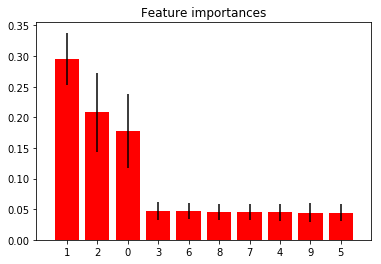

In [10]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Feature Importance - Olivetti Faces dataset

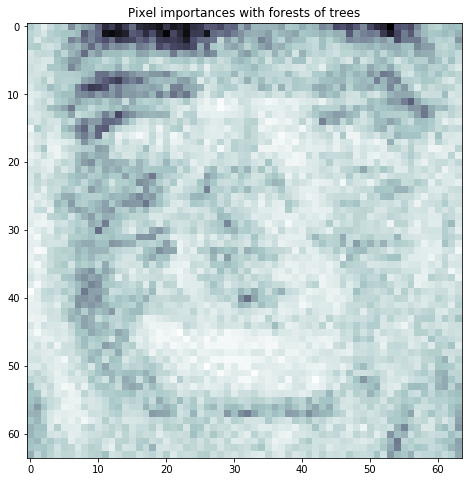

In [11]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
X = data.data
y = data.target

forest = ExtraTreesClassifier(n_estimators=1000, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("Pixel importances with forests of trees")
plt.show()

# 5. AdaBoost
* **Boosting**: instead of using pre-decided set of models, add models to the commitee **one-by-one**
  * A.k.a. **Stagewise Additive Modelling**
* **Single Model**:

>$$ k_m(x) = \begin{cases} 1 \\ -1 \end{cases} $$

* **Commitee**(set of models), $C$:

  * Instead of voting, the discriminant function is the linear combination of the outputs

>$$ C_{(m-1)}(x_i) =  \text{sign} \left( \alpha_1k_1(x_i) + \cdots + \alpha_{m-1}k_{m-1}(x_i) \right) $$

* **Exponential Loss Function**, $L_i$

  * Used to select the next model to be added
  * The model with the smallest $L$ gets selected

>$$ E = \sum_{y_i \neq k_m(x_i)} L_i^{(m)} = \sum_{y_i \neq k_m(x_i)} e^{-y_i C_{m-1}(x_i)}$$ 
>
>$$ y_i = C_{m-1} \;\; \rightarrow \;\; -y_i C_{m-1} = -1 $$
>
>$$ y_i \neq C_{m-1} \;\; \rightarrow \;\; -y_i C_{m-1} = 1 $$

* **Optimize the Weight**, $\alpha_m$

>$$ \epsilon_m = \dfrac{\sum_{y_i \neq k_m(x_i)} L_i^{(m)} }{ \sum_{i=1}^N L_i^{(m)}} $$
>
>$$ \alpha_m = \frac{1}{2}\log\left( \frac{1 - \epsilon_m}{\epsilon_m}\right) $$ 

## 5.1. AdaBoost - `Scikit-Learn`

### Step 1. Prepare Dataset

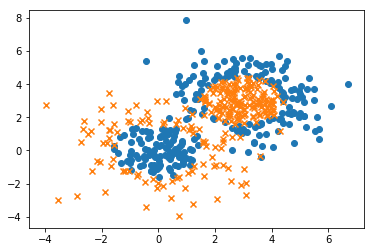

In [12]:
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.show()

### Step 2. Make a Base Model with Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

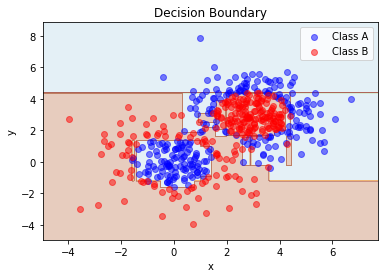

In [14]:
def plot_result(model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

    for i, n, c in zip(range(2), "AB", "br"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, alpha=0.5, label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')
    plt.grid(False)
    plt.show()
    
plot_result(tree)

### Step 3. Use `AdaBoostClassifier`

In [15]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0), 
                               algorithm="SAMME", n_estimators=100)
model_ada.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

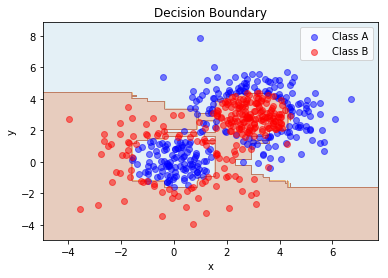

In [16]:
plot_result(model_ada)

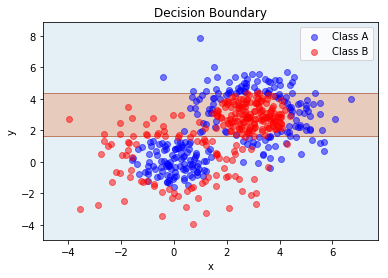

In [17]:
plot_result(model_ada.estimators_[0])

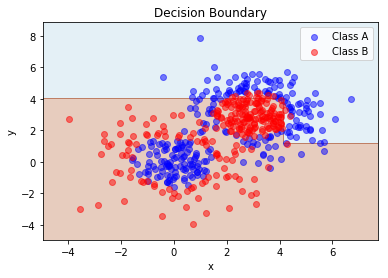

In [18]:
plot_result(model_ada.estimators_[1])

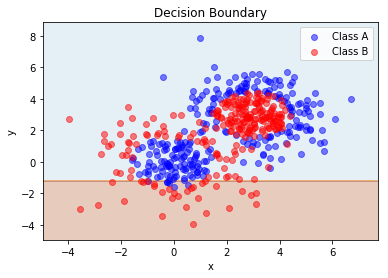

In [19]:
plot_result(model_ada.estimators_[2])

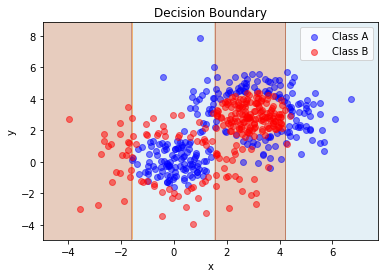

In [20]:
plot_result(model_ada.estimators_[3])

# 6. Gradient Boost
* **Gradient Descent for Optimization**:

>$$ x_{m} = x_{m-1} - \alpha_m \dfrac{df}{dx} $$

* **Apply this to the Loss Function**, $L(y, C_{m-1})$:

  * This gives us how the weak classifier, $k_m$ should look like

>$$ C_{m} = C_{m-1} - \alpha_m \dfrac{dL(y, C_{m-1})}{dC_{m-1}} = C_{m-1} + \alpha_m k_m $$
>
>$$ k_m = -\frac{dL(y, C_{m-1})}{dC_{m-1}}$$

* **Algorithm**:

>1. Find the weak classifier, $k_m$, which targets $-\tfrac{dL(y, C_m)}{dC_m}$
>2. Find the step size, $\alpha_m$, that minimizes $ \left( y - (C_{m-1} + \alpha_m k_m) \right)^2 $
>3. Update the model, $C_m = C_{m-1} + \alpha_m k_m$
>4. Continue


* **Example - if the loss function is the residual squared**:

>$$ L(y, C_{m-1}) = \dfrac{1}{2}(y - C_{m-1})^2 $$
>
>$$ -\dfrac{dL(y, C_m)}{dC_m} = y - C_{m-1} $$


## 6.1. Gradient Boost - `Scikit-Learn`

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)

In [22]:
%%time
model_grad.fit(X, y)

CPU times: user 38.1 ms, sys: 3.07 ms, total: 41.2 ms
Wall time: 41.1 ms


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

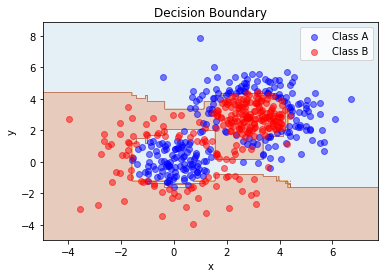

In [23]:
plot_result(model_grad)

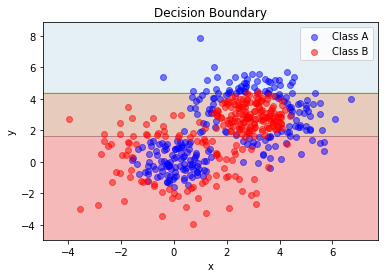

In [24]:
plot_result(model_grad.estimators_[0][0])

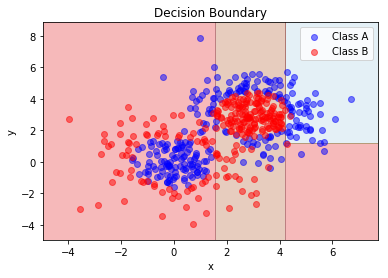

In [25]:
plot_result(model_grad.estimators_[1][0])

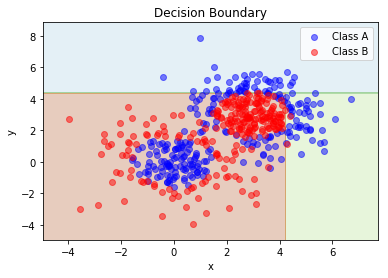

In [26]:
plot_result(model_grad.estimators_[2][0])

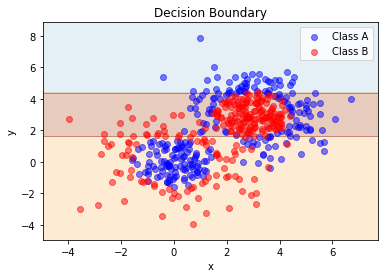

In [27]:
plot_result(model_grad.estimators_[3][0])

## 6.2. `XGBoost`

In [29]:
import xgboost

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

In [30]:
%time
model_xgb.fit(X, y)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


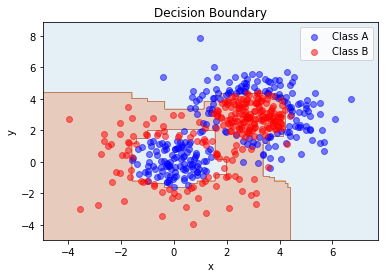

In [31]:
plot_result(model_xgb)